# Pre-processing the matched UNIONS + SDSS catalogue
Matched catalogue created by Stephen Gwyn, v1 (01/2022).

In [2]:
import numpy as np

import pandas as pd
import matplotlib.pylab as plt

from astropy.io import ascii
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.units as units

from uncertainties import ufloat
from collections import Counter

from functions import *

%matplotlib inline

# Pre-processing and checking

## Load catalogues

In [3]:
# File name base
base_name_ph = 'w3.ugriz.spec'

data = ascii.read(f'{base_name_ph}.txt')

In [4]:
# Print column names
print(data.keys())

['RA', 'Dec', 'CFIS_ID', 'u', 'u_err', 'g', 'g_err', 'r', 'r_err', 'i', 'i_err', 'z', 'z_err', 'sg', 'z_spec', 'zero']


## Plots

### Spatial distribution

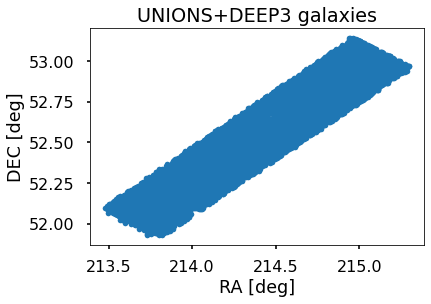

In [6]:
plt.plot(data['RA'], data['Dec'], '.')
plt.title('UNIONS+DEEP3 galaxies')
plt.xlabel('RA [deg]')
_ = plt.ylabel('DEC [deg]')

### Redshift distribution

No handles with labels found to put in legend.


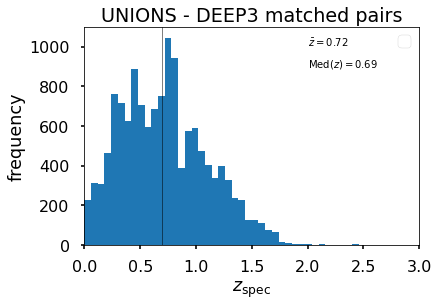

In [30]:
z_mean = np.mean(data['z_spec'])
z_median = np.median(data['z_spec'])

xlim = (0, 3)

fig, (ax) = plt.subplots(1, 1)
h = ax.hist(data['z_spec'], bins=50, range=xlim)

plt.xlim(xlim)
ylim = plt.ylim()
plt.ylim(ylim)

plt.plot([z_median]*2, ylim, 'k-', linewidth=0.5)

plt.title('UNIONS - DEEP3 matched pairs')
plt.xlabel(r'$z_{\rm spec}$')
plt.ylabel('frequency')

plt.text(2, 1000, rf'$\bar z = {z_mean:.2f}$')
plt.text(2, 900, rf'Med$(z) = {z_median:.2f}$')

_ = plt.legend()

## Magnitude distribution (r-band)

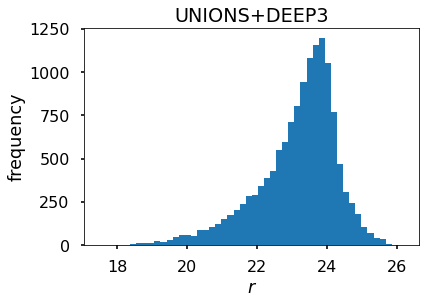

In [36]:
fig, (ax) = plt.subplots(1, 1)

h = ax.hist(data['r'], bins=50, range=(17.5, 26.2))
plt.title('UNIONS+DEEP3')
plt.xlabel('$r$')
_ = plt.ylabel('frequency')

In [ ]:
bands = ['u', 'g', 'r', 'i', 'z']
base_name = 'w3.ugriz.spec'
path_to_csv = f'{base_name}_matched.csv'

## Create pandas data frame

In [18]:
columns = []
for b in bands:
    columns.append(b)
columns.append('zspec')
print(columns)

['u', 'g', 'r', 'i', 'z', 'zspec']


In [20]:
# For testing:
# data_clean = data_gal[:1000]
data_clean = data

In [22]:
df = pd.DataFrame(data=list(zip(data_clean['u'], data_clean['g'], data_clean['r'], data_clean['i'], data_clean['z'], data_clean['z_spec'])),
                  columns=columns)

### Clean up

In [23]:
print(f'Data length before cleanup: {len(df)}')

Data length before cleanup: 13567


In [24]:
# Drop invalid rows
df.dropna(inplace=True)
print(f'Data length after removing first round of nans: {len(df)}')

Data length after removing first round of nans: 13567


In [25]:
# Mark redshift of 0
zsp0 = df.loc[df.zspec==0, 'zspec']
print(f'Number of objects with zspec=0: {len(zsp0)}')
df.loc[df.zspec==0, 'zspec'] = np.nan

Number of objects with zspec=0: 7


In [26]:
# Drop invalid rows
df.dropna(inplace=True)
print(f'Data length after removing zspec=0: {len(df)}')

Data length after removing zspec=0: 13560


In [27]:
df.replace(99, np.nan, inplace=True)
df.replace(-99, np.nan, inplace=True)

In [28]:
# Drop invalid rows
df.dropna(inplace=True)
print(f'Data length after removing invalid magnitudes: {len(df)}')

Data length after removing invalid magnitudes: 1283


## Write to file

In [29]:
df.to_csv(path_to_csv, index=False)